<img src="graphics/graphiti.jpeg" width=300 align="right">
<img src="graphics/graphiti_2.jpeg" width=300 align="right">  

# Lab 2. The line of best fit.
How it Thursday, again?! I guess we can do a #TBT. Did you ever plot some illustrations doing Graphiti in elementary school? When's the last time you had to make a scatterplot? Was it after a science lab? Was it for fun (like me?) Was it by hand? Let's learn how to do it in R on the computer.


## Recap
What did we do last time?

1. Load in our data
2. Learned `ggplot2` and `dplyr` syntax
3. Explored `dplyr` summary statistics and column manipulation
4. Made histograms and barplots using `geom_histogram()` and `geom_bar()`


## Goals
This lab will get you drawing dots and lines in R. (We won't be plotting TV's like on the right, but we'll be plotting cool numbers indeed!)

1. Libraries first, otherwise errors come next
2. Load **and look at** in our data  
    a. Check out the spreadsheet format  
    b. Check out how our data looks visually
3. Create a linear regression model
4. Interpret our results

In [3]:
library(dplyr)
library(ggplot2)
library(broom)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### Loading in data
We'll load in data and mutate it the same way as we did in our previous assignments (by creating `CS_rate_100`).

In [4]:
CS_data <- read.csv("rstudio-export/Data/Cesarean.csv")
CS_data$Income_Group <- forcats::fct_relevel(CS_data$Income_Group, 
                                            "Low income", "Lower middle income", 
                                            "Upper middle income", "High income: nonOECD", 
                                            "High income: OECD")
head(CS_data)

Country_Name,CountryCode,Births_Per_1000,Income_Group,Region,GDP_2006,CS_rate
Albania,ALB,46,Upper middle income,Europe & Central Asia,3051.768,0.256
Andorra,AND,1,High income: nonOECD,Europe & Central Asia,42417.229,0.237
United Arab Emirates,ARE,63,High income: nonOECD,Middle East & North Africa,42950.101,0.100
Argentina,ARG,689,High income: nonOECD,Latin America & Caribbean,6649.414,0.352
Armenia,ARM,47,Lower middle income,Europe & Central Asia,2126.619,0.141
Australia,AUS,267,High income: OECD,East Asia & Pacific,36100.559,0.303


In [5]:
CS_data <- CS_data %>% mutate(CS_rate_100 = CS_rate*100)
head(CS_data)

Country_Name,CountryCode,Births_Per_1000,Income_Group,Region,GDP_2006,CS_rate,CS_rate_100
Albania,ALB,46,Upper middle income,Europe & Central Asia,3051.768,0.256,25.6
Andorra,AND,1,High income: nonOECD,Europe & Central Asia,42417.229,0.237,23.7
United Arab Emirates,ARE,63,High income: nonOECD,Middle East & North Africa,42950.101,0.100,10.0
Argentina,ARG,689,High income: nonOECD,Latin America & Caribbean,6649.414,0.352,35.2
Armenia,ARM,47,Lower middle income,Europe & Central Asia,2126.619,0.141,14.1
Australia,AUS,267,High income: OECD,East Asia & Pacific,36100.559,0.303,30.3


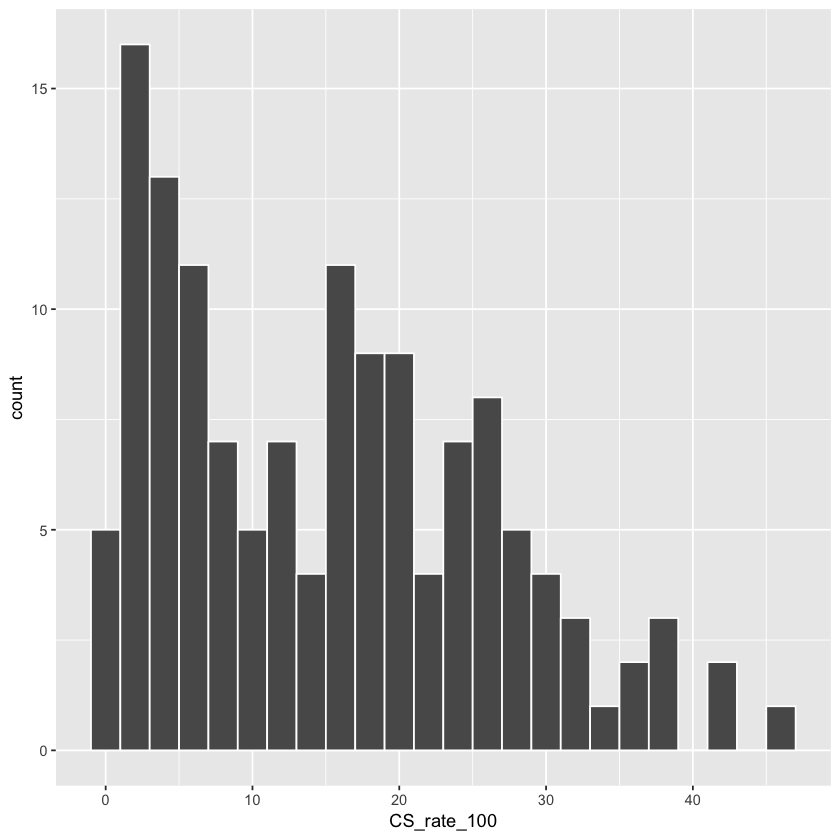

In [34]:
ggplot(CS_data, aes(x=CS_rate_100)) +
    geom_histogram(binwidth=2, color="white")

### Plotting our data
This does not look like data we can really draw a line through. While there's a lot of data concentrated to the left of the graph, a good amount is far away from that as well.

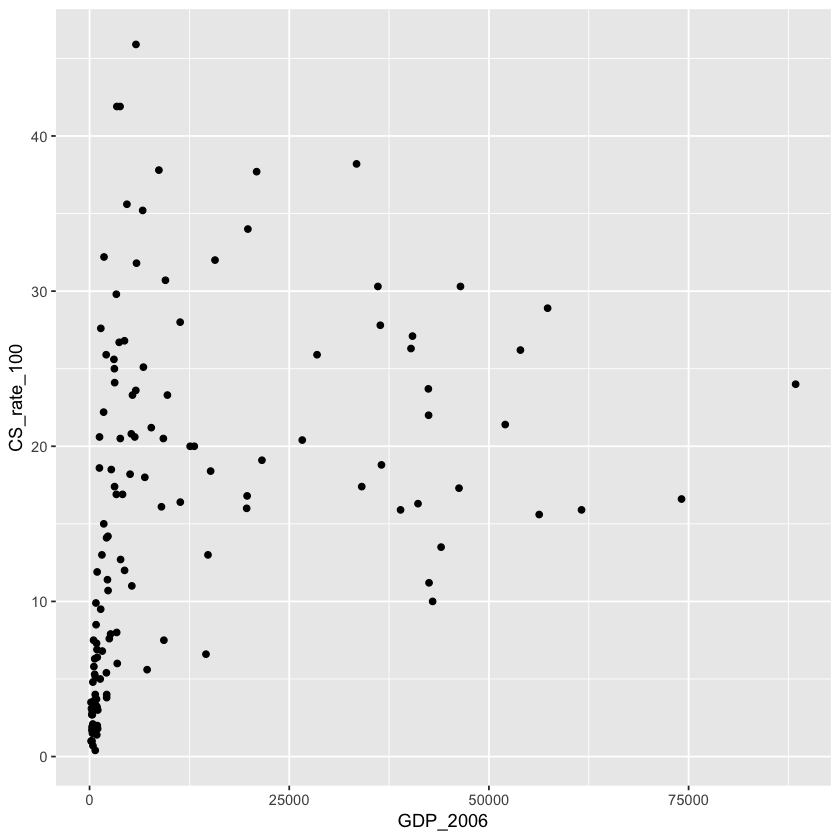

In [6]:
ggplot(CS_data, aes(x=GDP_2006, y=CS_rate_100)) + geom_point()

### Transforming data
We want to see if applying natural log to our data will make it look linear enough to draw a linear regression line on our data.

In [7]:
CS_data <- CS_data %>% mutate(log_CS=log(CS_rate_100),
                   log_GDP=log(GDP_2006))
names(CS_data)

[1] "Country_Name"    "CountryCode"     "Births_Per_1000" "Income_Group"   
 [5] "Region"          "GDP_2006"        "CS_rate"         "CS_rate_100"    
 [9] "log_CS"          "log_GDP"

Here's the plot. It sorta looks linear.

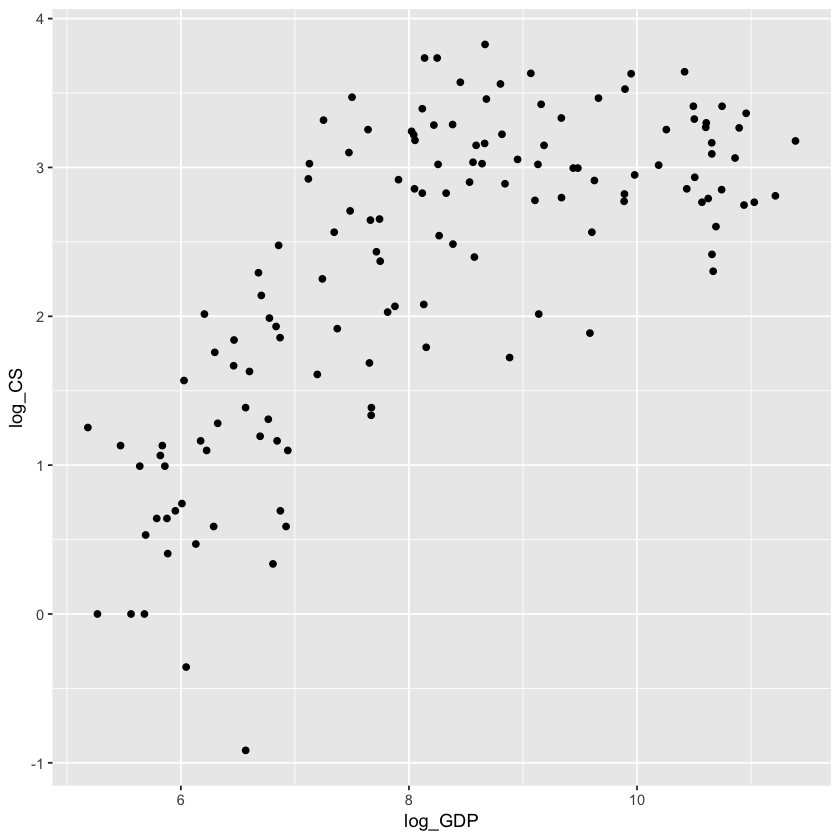

In [8]:
ggplot(CS_data, aes(x=log_GDP, y=log_CS)) +
    geom_point()

But it looks more curved. Check out how we're using `geom_smooth()`.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


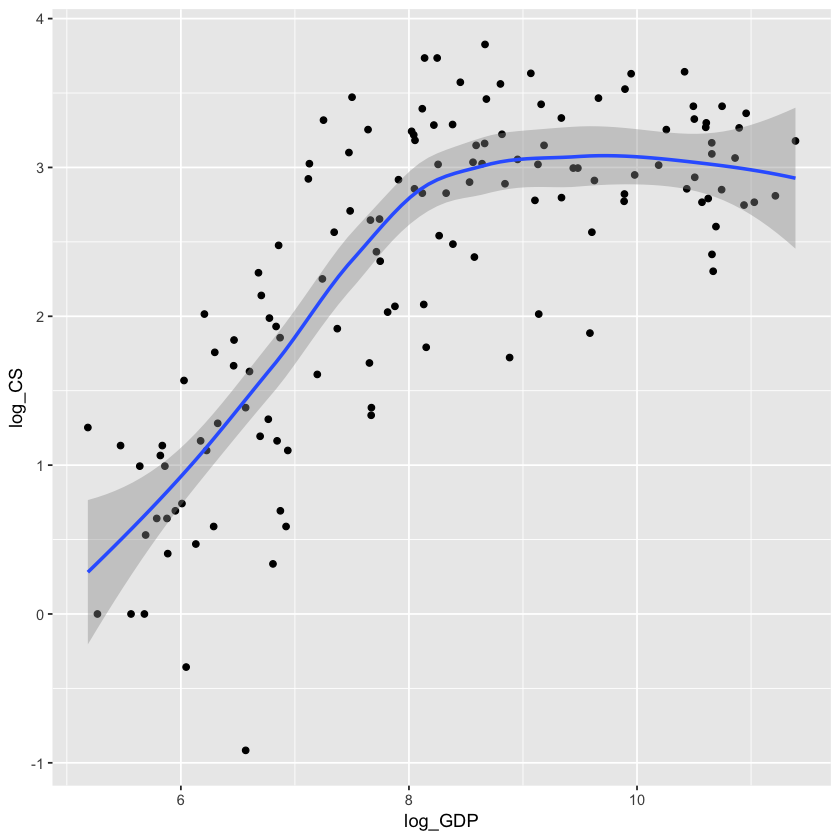

In [9]:
ggplot(CS_data, aes(x=log_GDP, y=log_CS)) + geom_point() + geom_smooth()

### Trends by income group
Something interesting to us might be to color our data points by income group. It may "unlock" some more patterns for us to explore. It seems that the high income data are not following the same upward trend as the low and middle income data points.

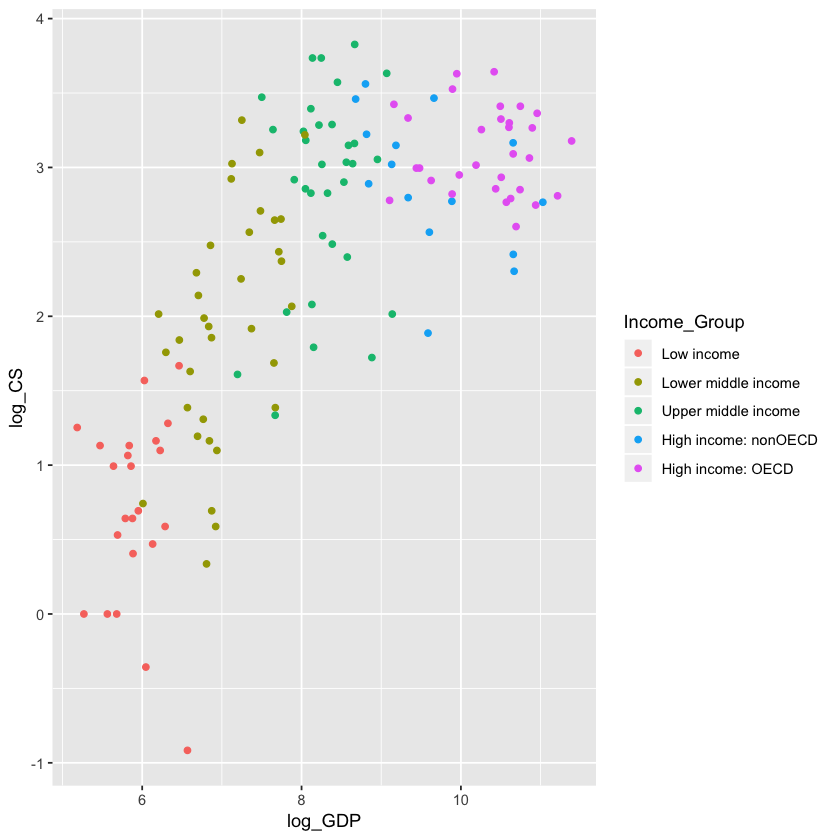

In [13]:
ggplot(CS_data, aes(x=log_GDP, y=log_CS)) +
    geom_point(aes(color=Income_Group))

### Creating subset
We want to pretty much remove all the high income data points from our dataset to see if we can generate a better linear model. We use `filter()` to do this. The syntax is a little different than what you've seen so far. Let's break it down.

This line `filter(Income_Group %in% c("Low Income", "Lower middle income", "Upper middle income")` means we only want rows that have either `"Low Income"`, `"Lower middle income"`, or `Upper middle income` associated with them.

The `c()` function is makes a "vector" (like what you've seen in calculus), but with words. If you need another metaphor, then this means we want only the rows that have a value that is within our vector bucket that includes those three income values.

In [16]:
CS_data_sub <- CS_data %>%
    filter(Income_Group %in% c("Low Income", "Lower middle income", "Upper middle income"))

In [14]:
head(CS_data)

Country_Name,CountryCode,Births_Per_1000,Income_Group,Region,GDP_2006,CS_rate,CS_rate_100,log_CS,log_GDP
Albania,ALB,46,Upper middle income,Europe & Central Asia,3051.768,0.256,25.6,3.242592,8.023476
Andorra,AND,1,High income: nonOECD,Europe & Central Asia,42417.229,0.237,23.7,3.165475,10.655310
United Arab Emirates,ARE,63,High income: nonOECD,Middle East & North Africa,42950.101,0.100,10.0,2.302585,10.667794
Argentina,ARG,689,High income: nonOECD,Latin America & Caribbean,6649.414,0.352,35.2,3.561046,8.802284
Armenia,ARM,47,Lower middle income,Europe & Central Asia,2126.619,0.141,14.1,2.646175,7.662289
Australia,AUS,267,High income: OECD,East Asia & Pacific,36100.559,0.303,30.3,3.411148,10.494064


In [15]:
dim(CS_data)

[1] 137  10

In [17]:
dim(CS_data_sub)

[1] 68 10

We can draw a straight line through these data, but at the end of the day, the line still doesn't fit the pattern that well (if there is one.)

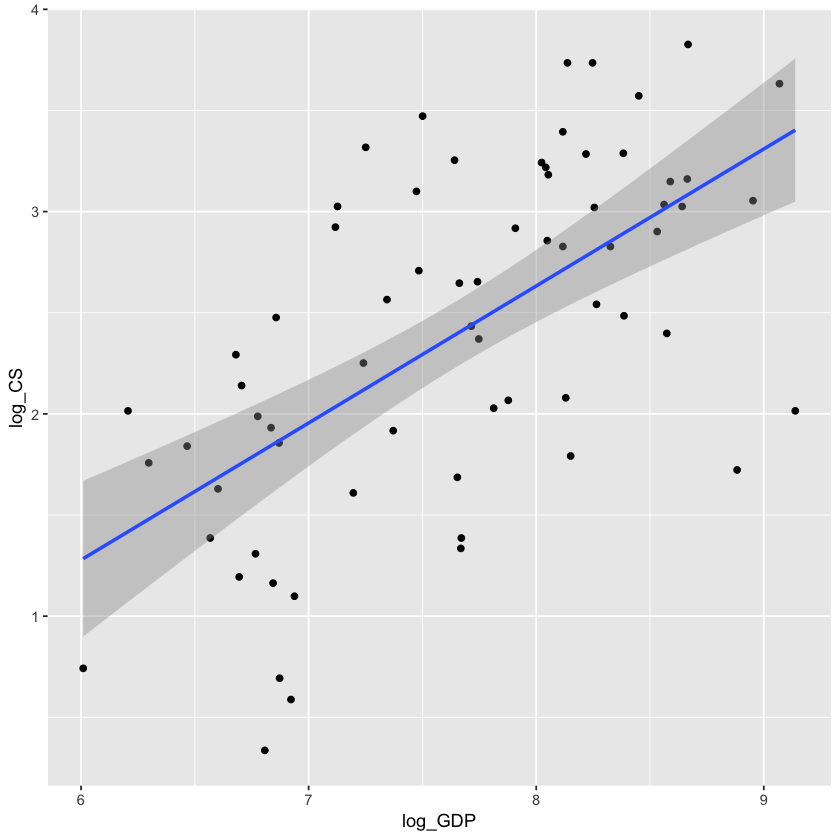

In [25]:
ggplot(CS_data_sub, aes(x=log_GDP, y=log_CS)) + geom_point() + geom_smooth(method="lm")

### Making linear model
We make a linear model using `lm()`.

In [46]:
# lm(y_variable ~ x_variable, data=whatever_your_dataframe_is)
mod_1 <- lm(log_CS~log_GDP, data=CS_data_sub)

The `tidy()` function makes the output easier for us to read.

In [47]:
tidy(mod_1)

term,estimate,std.error,statistic,p.value
(Intercept),-2.7857853,0.8159837,-3.414021,1.098596e-03
log_GDP,0.6772512,0.1060602,6.385534,1.973369e-08


**Interpretation of the intercept** If (x-variable) log GDP were to be 0, then the (y-variable) log CS rate would be -2.7857853.

**Interpretation of the slope** If we increase (x-variable) by one unit of log GDP, then the (y-variable) log CS rate would increase by 0.6772512 log GDP units.

And `glance()` gives us $R^2$.

In [53]:
glance(mod1)

,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
value,0.381878,0.3725125,0.6134315,40.77504,1.973369e-08,2,-62.24213,130.4843,137.1428,24.83568,66


A better (I think) way to draw our regression line on our plot is by using `geom_abline()`.

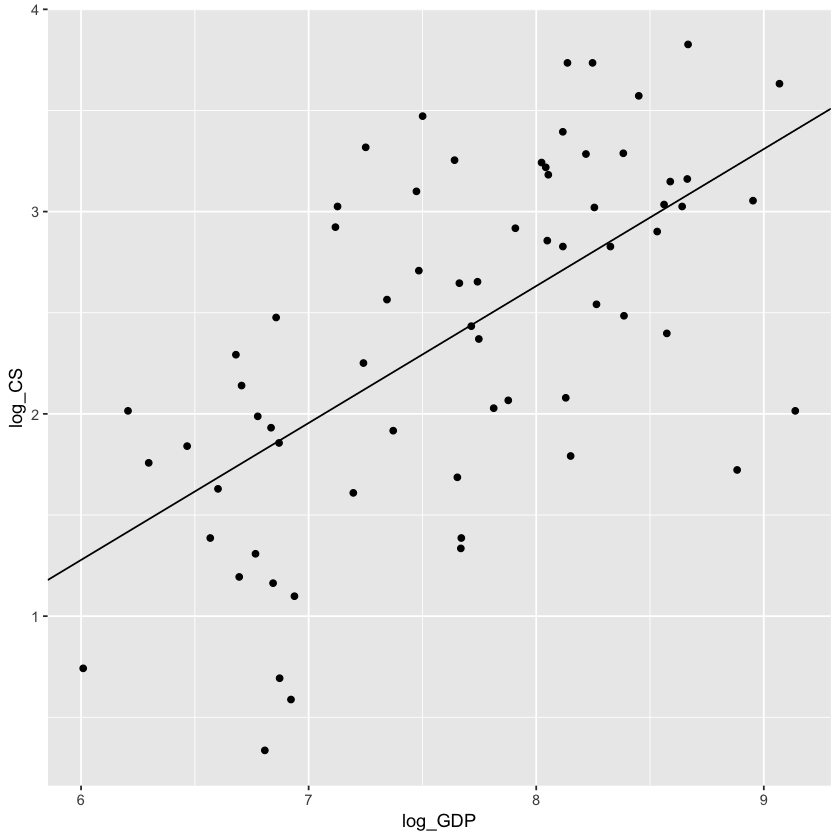

In [52]:
ggplot(CS_data_sub, aes(x=log_GDP, y=log_CS)) +
    geom_abline(slope=0.6772512, intercept=-2.7857853) +
    geom_point()